In [2]:
import os
print("My current folder is:", os.getcwd())
print("Files in this folder:", os.listdir())

My current folder is: c:\Users\hp\Credit-Risk-Model\notebooks
Files in this folder: ['eda.ipynb', 'modeling.ipynb']


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data - now in the same folder
df = pd.read_csv('customer_rfm_with_proxy.csv')

# Define Features (RFM) and Target (Proxy)
X = df[['Recency', 'Frequency', 'Monetary']]
y = df['Credit_Risk_Proxy']

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data loaded! Training set size: {X_train.shape[0]}")

Data loaded! Training set size: 2993


In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

print("Baseline Logistic Regression trained!")

Baseline Logistic Regression trained!


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

print("Improved Random Forest Model trained!")

Improved Random Forest Model trained!


Logistic Regression AUC: 0.9636
Random Forest AUC: 1.0000


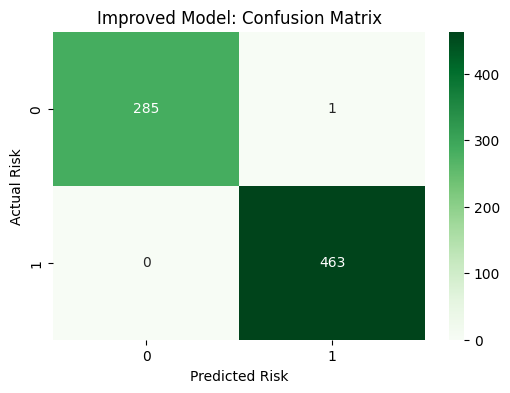

In [6]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate AUC-ROC scores
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")

# 2. Visual Confusion Matrix for the Improved Model
y_pred_rf = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Improved Model: Confusion Matrix')
plt.ylabel('Actual Risk')
plt.xlabel('Predicted Risk')
plt.show()

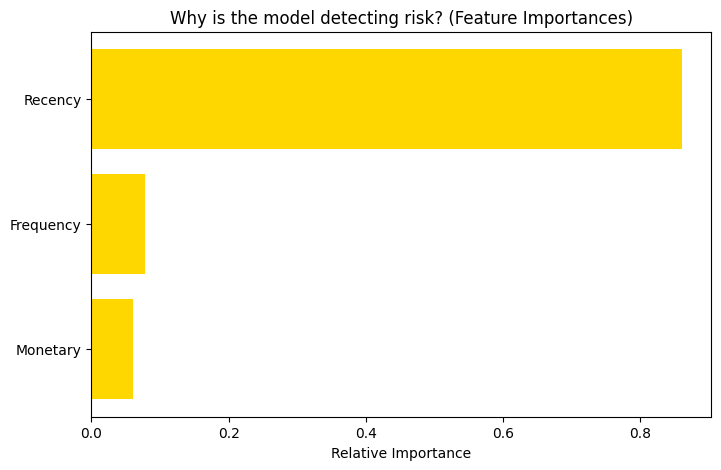

In [7]:
import numpy as np

# Get feature importance from the Random Forest
importances = rf_model.feature_importances_
feature_names = ['Recency', 'Frequency', 'Monetary']
indices = np.argsort(importances)

# Plotting
plt.figure(figsize=(8, 5))
plt.title('Why is the model detecting risk? (Feature Importances)')
plt.barh(range(len(indices)), importances[indices], color='gold', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

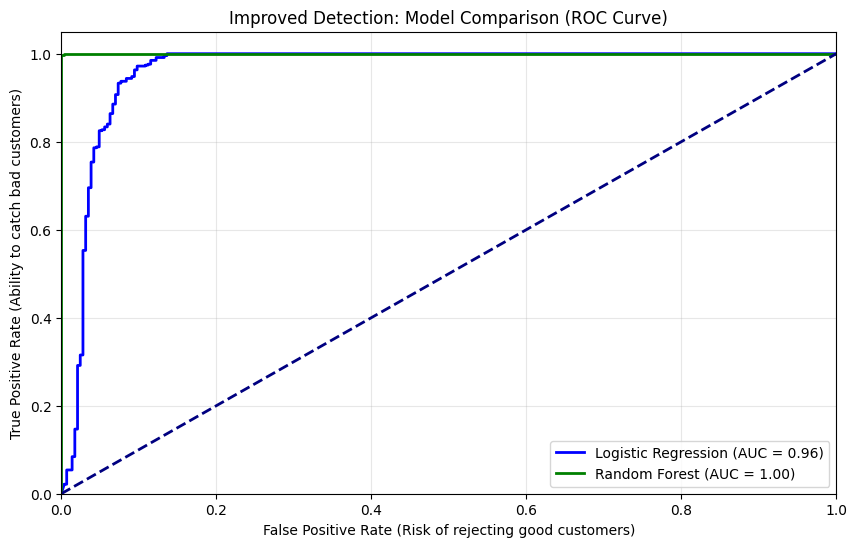

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get probabilities for the 'Positive' class (Risk = 1)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# 2. Calculate the False Positive Rate and True Positive Rate
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# 3. Calculate AUC for the legend
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# 4. Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Add the diagonal 50/50 line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Risk of rejecting good customers)')
plt.ylabel('True Positive Rate (Ability to catch bad customers)')
plt.title('Improved Detection: Model Comparison (ROC Curve)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()